In [9]:
import os
import sys
import yaml
import argparse

x = !pwd
sys.path.append(os.path.dirname(x[0]))

import matplotlib.pyplot as plt

from feature_extraction import process_track
from utilities import load_track, write_audio
from train_utils import make_supervised_model

from timbre_transfer import make_model_from_config
from dataloader import load_dataset

def print_plot_play(x, Fs=16000, text='', normalize=False):
    import IPython.display as ipd
    print('%s\n' % (text))
    print('Fs = %d, x.shape = %s, x.dtype = %s' % (Fs, x.shape, x.dtype))
    plt.figure(figsize=(8, 2))
    plt.plot(x, color='gray')
    plt.xlim([0, x.shape[0]])
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()
    ipd.display(ipd.Audio(data=x, rate=Fs, normalize=normalize))

In [4]:
config_path = "/home/ubuntu/ddsp_simplified/wandb/run-20211001_081057-2nmnekfw/files/NoLatent_Reverb/model.yaml"

In [7]:
with open(config_path, 'r') as file:
    config = dict(yaml.load(file, Loader=yaml.FullLoader))    
print(config['run_name'])
model = make_model_from_config(config)

NoLatent_Reverb


2021-10-01 17:13:07.981746: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-01 17:13:07.984700: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-10-01 17:13:08.033874: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-01 17:13:08.034447: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:1e.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-10-01 17:13:08.034478: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-10-01 17:13:08.037435: I tensorflow/stream_executor/platform/default/dso_loade

In [10]:
train_set, validation_set, _ = load_dataset(config['data']['path'])

2021-10-01 17:16:16.903967: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 106752000 exceeds 10% of free system memory.


In [18]:
for batch in validation_set:
    break

In [27]:
for k,v in batch.items():
    print(k, v.shape)

audio (32, 64000)
f0_hz (32, 1000)
loudness_db (32, 1000)


In [41]:
i = 5
features = {k: v[i] for k,v in batch.items()}

In [42]:
track = model.transfer_timbre(features)



Fs = 16000, x.shape = (64000,), x.dtype = float32


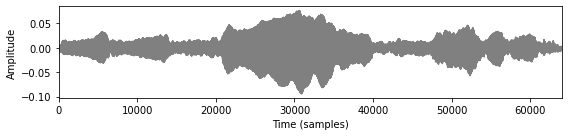

In [43]:
print_plot_play(track)